**Cardiovacular Disease Analysis and Prediction Using Machine Learning Focusing on Modifiable Risk Factors**

**Problem**


Cardiovascular disease is one of the leading cause of death worldwide, timely detection and accurate prediction crucial for effective management and prevention.The diagnosis of Cardiovascular disease can be challenging due to its complex nature and the presence of various risk factors. Traditional diagnostic methods may lack the precision and efficiency needed for early detection and prediction. Therefore, there is a pressing need to develop advanced machine learning models that can analyze patient data and accurately predict the likelihood of Cardiovascular disease, enabling proactive healthcare interventions.

!pip install researchpy

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import researchpy as rp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Cardiovascular.csv to Cardiovascular.csv


In [4]:
# Load dataset
data = pd.read_csv("Cardiovascular.csv")
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,outcome
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [5]:
data.drop(columns=['patientid'], inplace=True)

In [6]:
data.head(10)

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,outcome
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1
5,24,1,1,173,0,0,0,161,0,4.7,3,2,1
6,79,1,2,130,240,0,2,157,0,2.5,2,1,1
7,52,1,0,127,345,0,0,192,1,4.9,1,0,0
8,62,1,0,121,357,0,1,138,0,2.8,0,0,0
9,61,0,0,190,181,0,1,150,0,2.9,2,0,1


**Exploring Data**

In [7]:
# check shape of data
data.shape

(1000, 13)

In [8]:
# dtypes
data.dtypes

,0
age,int64
gender,int64
chestpain,int64
restingBP,int64
serumcholestrol,int64
fastingbloodsugar,int64
restingrelectro,int64
maxheartrate,int64
exerciseangia,int64
oldpeak,float64


In [9]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   int64  
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   int64  
 11  noofmajorvessels   1000 non-null   int64  
 12  outcome            1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


In [10]:
data[['gender','outcome']] = data[['gender','outcome']].astype(object)

In [11]:
# check missing data
data.isnull().sum()

,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0
oldpeak,0


**Descriptive Statistic**

In [12]:
# select numeric data
num_cols = data.select_dtypes(exclude = 'object')
num_cols.head()

,age,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,53,2,171,0,0,1,147,0,5.3,3,3
1,40,0,94,229,0,1,115,0,3.7,1,1
2,49,2,133,142,0,0,202,1,5.0,1,0
3,43,0,138,295,1,1,153,0,3.2,2,2
4,31,1,199,0,0,2,136,0,5.3,3,2


In [13]:
num_cols.columns

Index(['age', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar',
       'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope',
       'noofmajorvessels'],
      dtype='object')

In [14]:
# summary statistics of numerical variables
rp.summarize(num_cols[['age', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar',
       'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope',
       'noofmajorvessels']])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,age,1000,49.242,49.0,319.1486,17.8647,0.5649,age
1,chestpain,1000,0.98,1.0,0.9085,0.9532,0.0301,chestpain
2,restingBP,1000,151.747,147.0,897.9149,29.9652,0.9476,restingBP
3,serumcholestrol,1000,311.447,318.0,17541.3606,132.4438,4.1882,serumcholestrol
4,fastingbloodsugar,1000,0.296,0.0,0.2086,0.4567,0.0144,fastingbloodsugar
5,restingrelectro,1000,0.748,1.0,0.5931,0.7701,0.0244,restingrelectro
6,maxheartrate,1000,145.477,146.0,1168.9744,34.1903,1.0812,maxheartrate
7,exerciseangia,1000,0.498,0.0,0.2502,0.5002,0.0158,exerciseangia
8,oldpeak,1000,2.7077,2.4,2.961,1.7208,0.0544,oldpeak
9,slope,1000,1.54,2.0,1.0074,1.0037,0.0317,slope


In [15]:
# select categorical data
cat_cols = data.select_dtypes(include = 'object')
cat_cols.head()

,gender,outcome
0,1,1
1,1,0
2,1,0
3,1,1
4,1,1


In [16]:
# summary statistics of categorical variables
rp.summary_cat(cat_cols[['gender', 'outcome']])

,Variable,Outcome,Count,Percent
0,gender,1,765,76.5
1,,0,235,23.5
2,outcome,1,580,58.0
3,,0,420,42.0


**Correlations between Variable**

In [17]:
# correlation: Pearson’s by default
num_cols.corr(method='pearson')

,age,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
age,1.000000,0.037731,-0.016126,0.035439,0.049732,0.067736,-0.040092,-0.037581,-0.026020,-0.015334,0.025407
chestpain,0.037731,1.000000,0.222267,0.174731,0.232059,0.256316,0.114496,-0.027376,0.101345,0.472731,0.285156
restingBP,-0.016126,0.222267,1.000000,0.126523,0.192063,0.219887,0.095569,-0.046545,-0.004225,0.376711,0.263194
serumcholestrol,0.035439,0.174731,0.126523,1.000000,0.278337,0.101767,0.038967,0.029422,-0.025910,0.165569,0.132419
fastingbloodsugar,0.049732,0.232059,0.192063,0.278337,1.000000,0.143982,0.096528,0.011356,0.015311,0.242734,0.182246
restingrelectro,0.067736,0.256316,0.219887,0.101767,0.143982,1.000000,0.099991,-0.032489,0.040291,0.343280,0.204684
maxheartrate,-0.040092,0.114496,0.095569,0.038967,0.096528,0.099991,1.000000,0.015536,0.044614,0.201515,0.122763
exerciseangia,-0.037581,-0.027376,-0.046545,0.029422,0.011356,-0.032489,0.015536,1.000000,-0.003296,-0.017783,-0.017513
oldpeak,-0.026020,0.101345,-0.004225,-0.025910,0.015311,0.040291,0.044614,-0.003296,1.000000,0.208789,0.086992
slope,-0.015334,0.472731,0.376711,0.165569,0.242734,0.343280,0.201515,-0.017783,0.208789,1.000000,0.526536


**Skewness**

In [18]:
num_cols.skew()

,0
age,0.028408
chestpain,0.345702
restingBP,0.020204
serumcholestrol,-0.307025
fastingbloodsugar,0.895118
restingrelectro,0.465389
maxheartrate,-0.251154
exerciseangia,0.008012
oldpeak,0.302066
slope,-0.053399


**Data Visualizations**

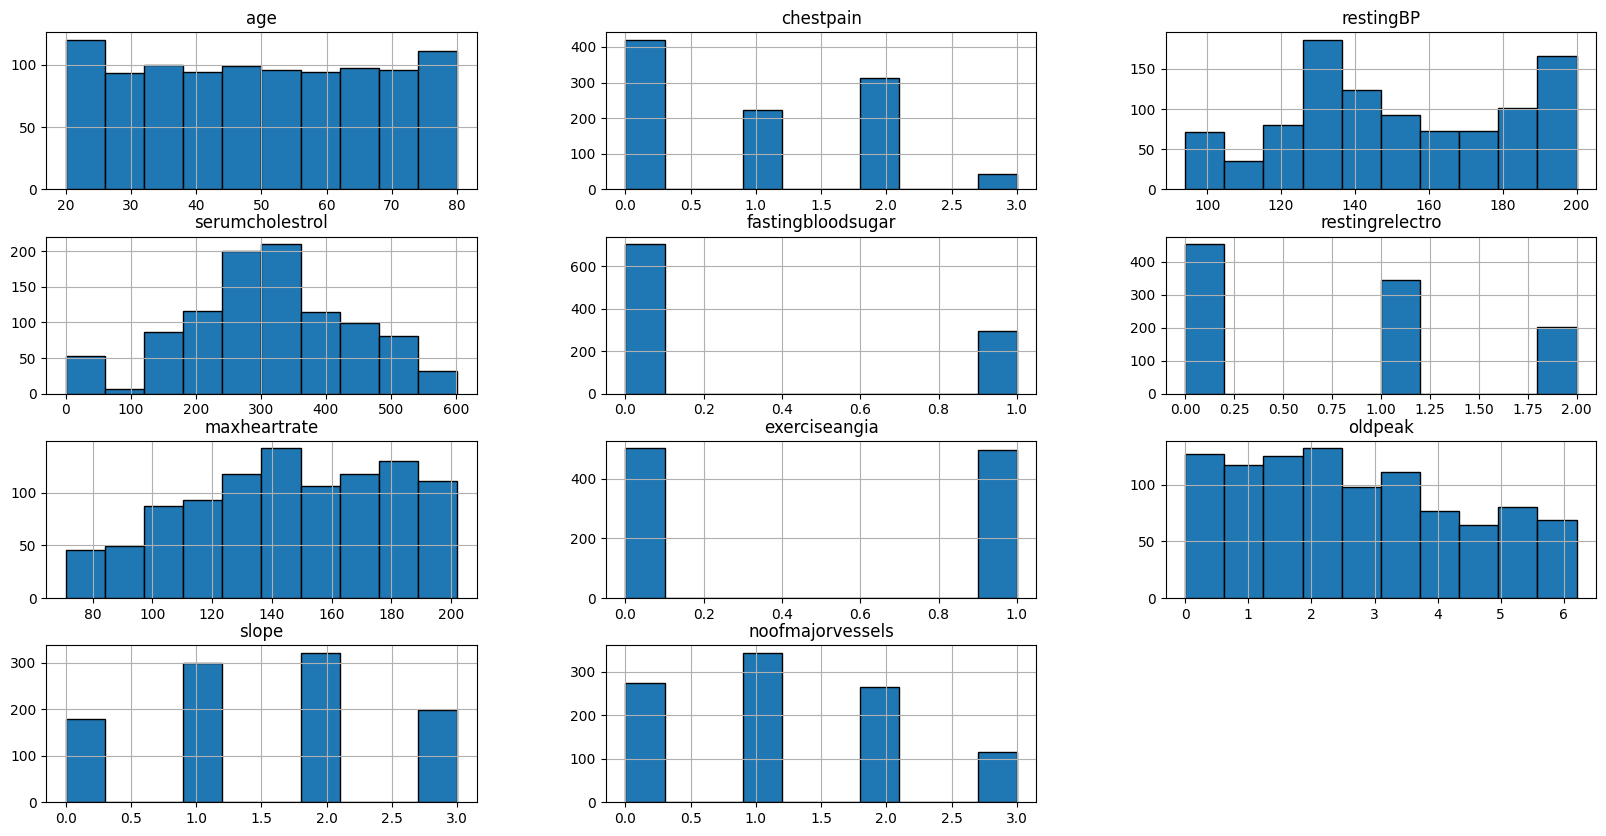

In [19]:
# Univariate distributions with histogram
data.select_dtypes(exclude = "object").hist(figsize=(20,10), edgecolor='black')
plt.show()

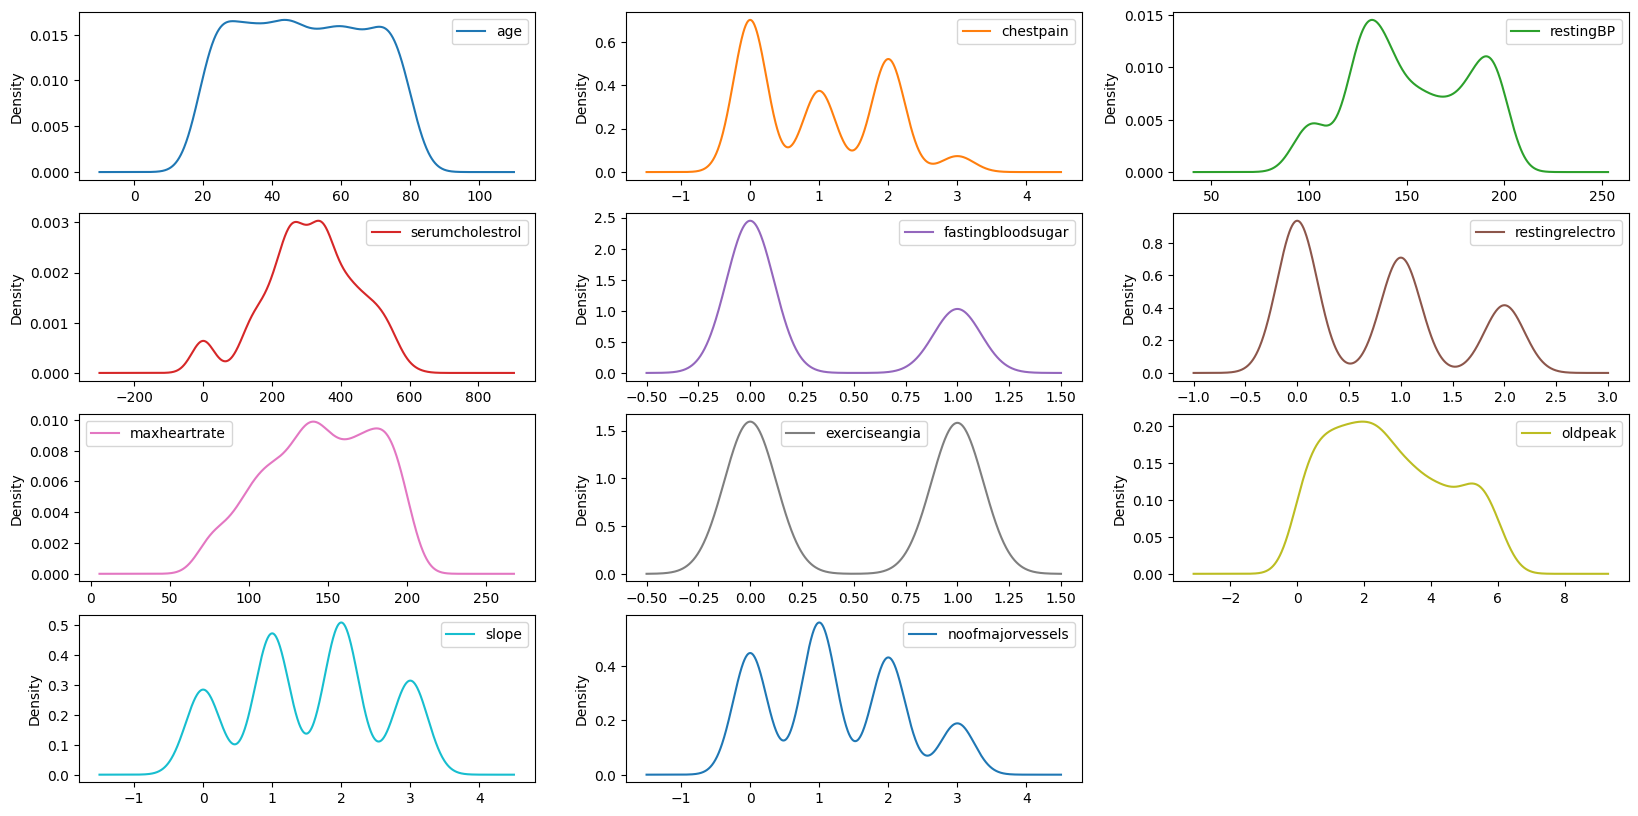

In [20]:
# Univariate distributions with density plot
data.select_dtypes(exclude = "object").plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(4,3))
plt.show()

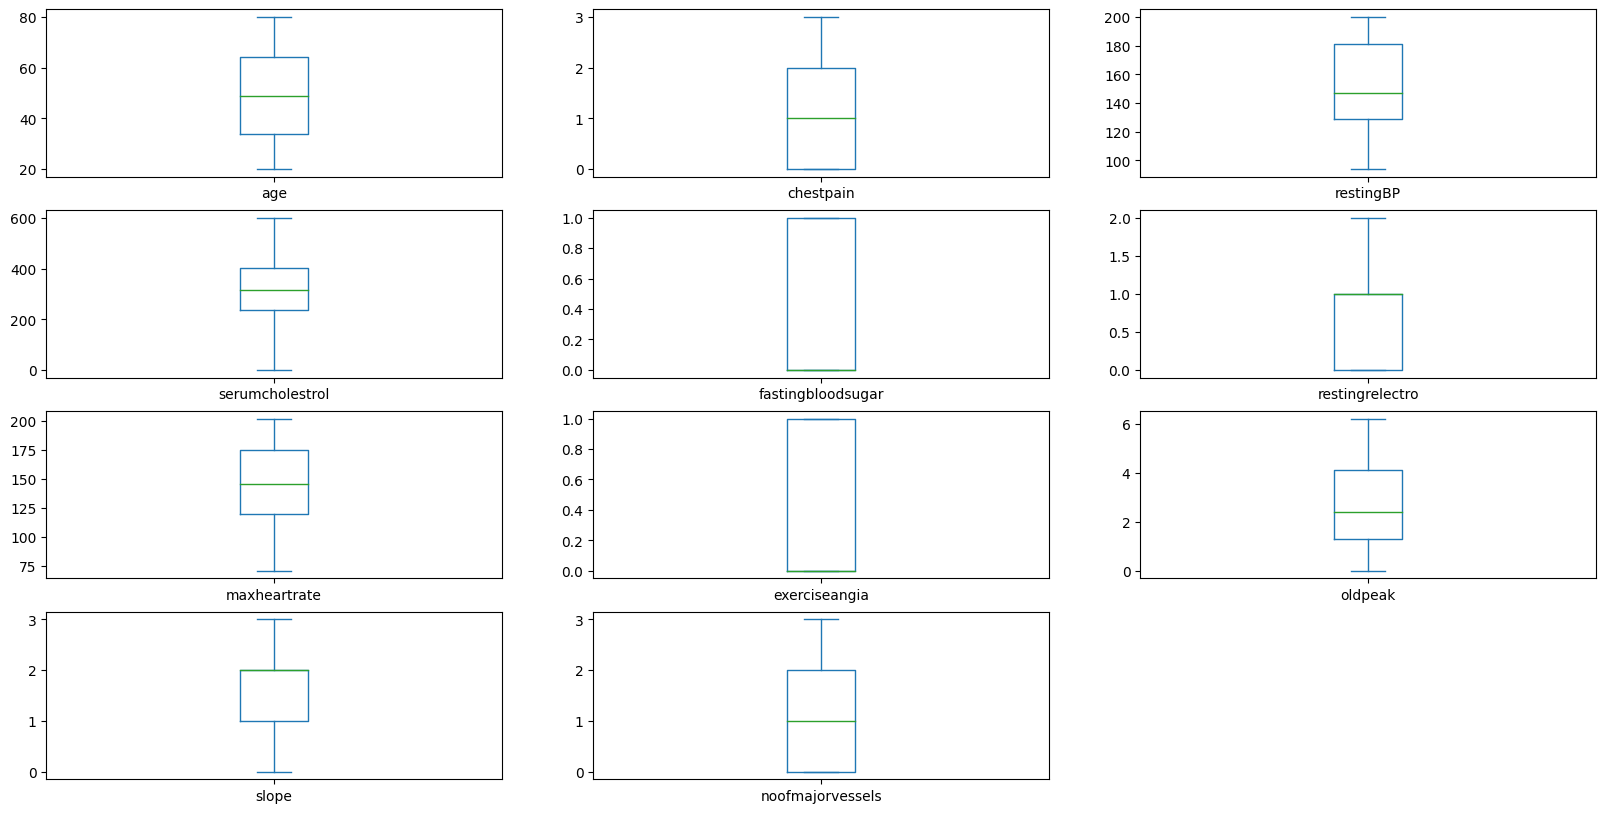

In [21]:
# Univariate distributions with box plots
data.select_dtypes(exclude = "object").plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(4,3))
plt.show()

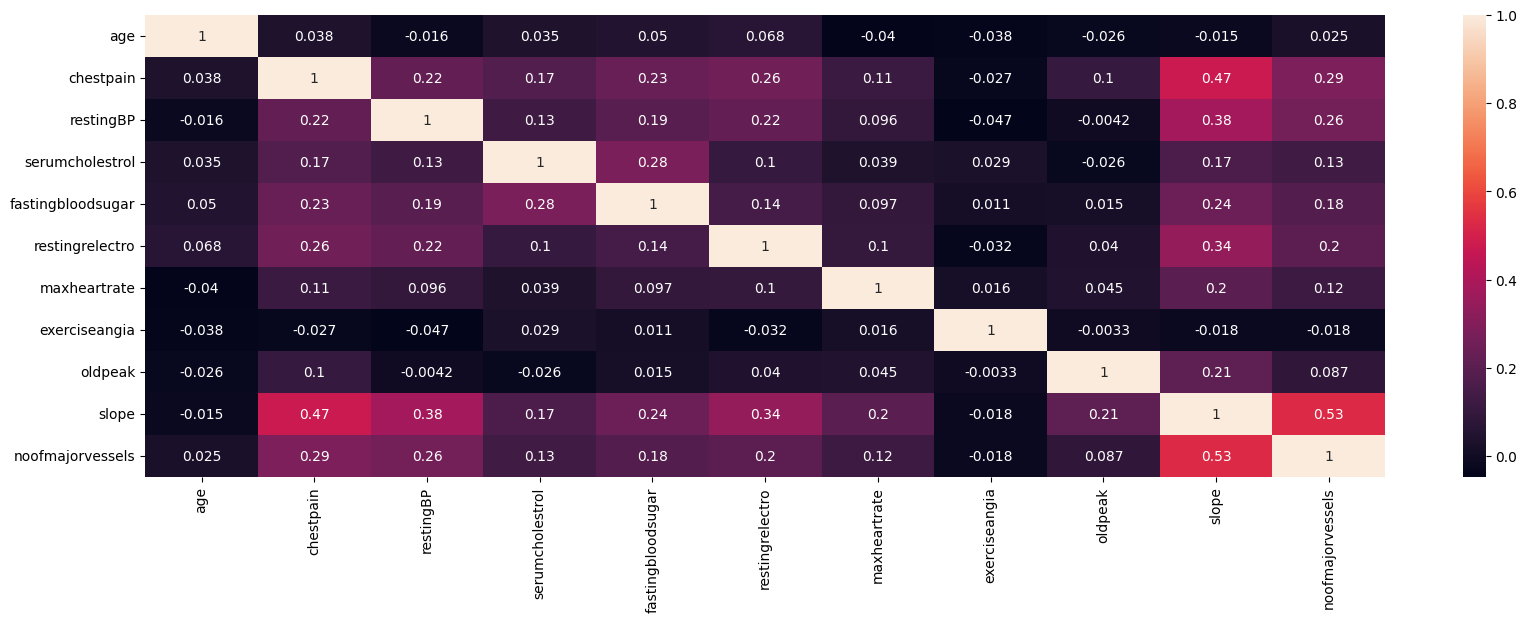

In [22]:
# Multivariate plots with correlations
plt.figure(figsize=(20,6))
corr = num_cols.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [32]:
!pip install -q --upgrade pip  # Upgrade pip to avoid any dependency issues
!pip install -q pycaret  # Install PyCaret silently to avoid long output


**Setup**

In [33]:
# import pycaret classification and init setup
from pycaret.classification import *
setup(data, target = 'outcome', session_id = 123)

ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.10/dist-packages/scipy/__init__.py)

# New Section

**Compare Models**

In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9829,0.9977,0.9877,0.9830,0.9852,0.9648,0.9653,0.2910
gbc,Gradient Boosting Classifier,0.9757,0.9967,0.9802,0.9782,0.9789,0.9502,0.9510,0.4000
rf,Random Forest Classifier,0.9743,0.9958,0.9803,0.9758,0.9778,0.9472,0.9478,0.2730
ada,Ada Boost Classifier,0.9700,0.9965,0.9779,0.9709,0.9742,0.9384,0.9390,0.2730
et,Extra Trees Classifier,0.9671,0.9972,0.9777,0.9662,0.9717,0.9325,0.9332,0.2300
xgboost,Extreme Gradient Boosting,0.9671,0.9947,0.9704,0.9732,0.9716,0.9326,0.9332,0.1250
lr,Logistic Regression,0.9643,0.9926,0.9705,0.9686,0.9692,0.9267,0.9276,1.0220
ridge,Ridge Classifier,0.9614,0.9914,0.9582,0.9753,0.9664,0.9212,0.9222,0.0760
lda,Linear Discriminant Analysis,0.9614,0.9915,0.9582,0.9753,0.9664,0.9212,0.9222,0.0750
qda,Quadratic Discriminant Analysis,0.9600,0.9947,0.9754,0.9574,0.9658,0.9176,0.9192,0.0780


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Create Model**

In [ ]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9714,0.9933,0.9756,0.9756,0.9756,0.9411,0.9411
3,0.9857,1.0000,1.0000,0.9762,0.9880,0.9704,0.9708
4,0.9714,1.0000,0.9512,1.0000,0.9750,0.9417,0.9433
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9857,0.9967,1.0000,0.9756,0.9877,0.9707,0.9711
7,0.9714,0.9950,0.9750,0.9750,0.9750,0.9417,0.9417
8,0.9714,0.9992,0.9750,0.9750,0.9750,0.9417,0.9417


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# print model parameters
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


**Tune Model**

In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,1.0000,1.0000,0.9762,0.9880,0.9704,0.9708
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9714,0.9874,1.0000,0.9535,0.9762,0.9405,0.9422
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9857,1.0000,0.9756,1.0000,0.9877,0.9707,0.9711
5,0.9857,0.9950,1.0000,0.9762,0.9880,0.9704,0.9708
6,0.9571,0.9950,0.9750,0.9512,0.9630,0.9121,0.9125
7,0.9429,0.9900,0.9750,0.9286,0.9512,0.8824,0.8839
8,0.9571,0.9933,0.9750,0.9512,0.9630,0.9121,0.9125


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_lightgbm, tuner = tune_model(lightgbm, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,1.0000,1.0000,0.9762,0.9880,0.9704,0.9708
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9714,0.9874,1.0000,0.9535,0.9762,0.9405,0.9422
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9857,1.0000,0.9756,1.0000,0.9877,0.9707,0.9711
5,0.9857,0.9950,1.0000,0.9762,0.9880,0.9704,0.9708
6,0.9571,0.9950,0.9750,0.9512,0.9630,0.9121,0.9125
7,0.9429,0.9900,0.9750,0.9286,0.9512,0.8824,0.8839
8,0.9571,0.9933,0.9750,0.9512,0.9630,0.9121,0.9125


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['age',
                                                                          'chestpain',
                                                                          'restingBP',
                                                                          'serumcholestrol',
                                                                          'fastingbloodsugar',
                                                                          'restingrelectro',
                                                                          'maxheartrate',
                                                                          'exerciseangia',
                                                                          'oldpeak',
                                                                          'slope'...
                                        'actual_estimator__reg_alpha': [1e-07,
                                                                        1e-06,
                                                                        0.0001,
                                                                        0.001,
                                                                        0.01,
                                                                        0.0005,
                                                                        0.005,
                                                                        0.05,
                                                                        0.1,
                                                                        0.15,
                                                                        0.2,
                                                                        0.3,
                                                                        0.4,
                                                                        0.5,
                                                                        0.7, 1,
                                                                        2, 3, 4,
                                                                        5, 10],
                                        'actual_estimator__reg_lambda': [1e-07,
                                                                         1e-06,
                                                                         0.0001,
                                                                         0.001,
                                                                         0.01,
                                                                         0.0005,
                                                                         0.005,
                                                                         0.05,
                                                                         0.1,
                                                                         0.15,
                                                                         0.2,
                                                                         0.3,
                                                                         0.4,
                                                                         0.5,
                                                                         0.7, 1,
                                                                         2, 3,
                                                                         4, 5,
                                                                         10]},
              

**Analyze Model**

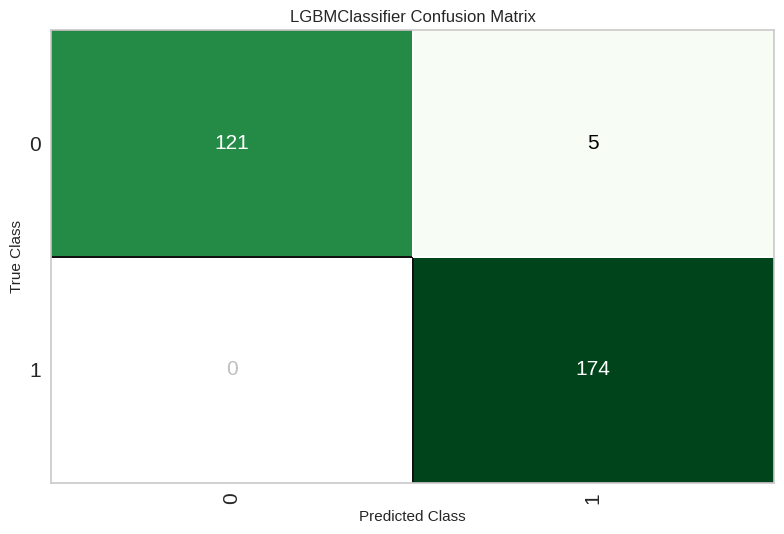

In [ ]:
# plot confusion matrix
plot_model(lightgbm, plot = 'confusion_matrix')

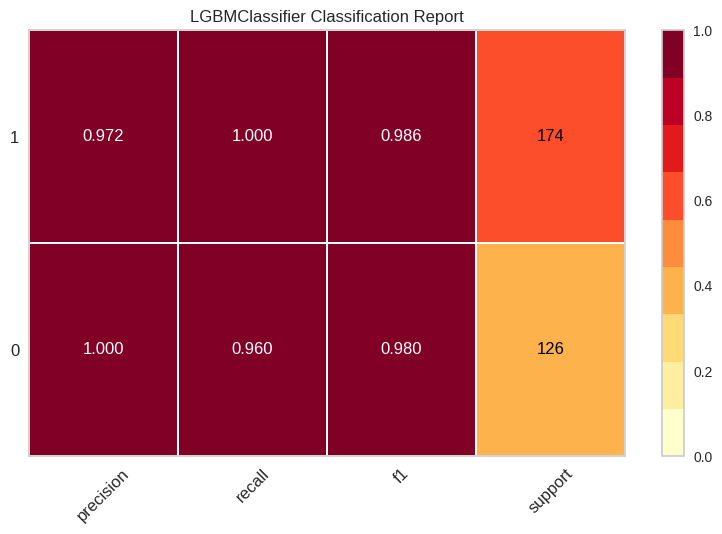

In [ ]:
# plot class report
plot_model(lightgbm, plot = 'class_report')

**Evaluate Model**

In [ ]:
# evaluate model
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Finalize Model**

In [ ]:
# finalize a model
finalize_model(lightgbm)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'chestpain', 'restingBP',
                                             'serumcholestrol',
                                             'fastingbloodsugar',
                                             'restingrelectro', 'maxheartrate',
                                             'exerciseangia', 'oldpeak',
                                             'slope', 'noofmajorvessels'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_featu...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

**Prediction**

In [ ]:
# predict on test set
holdout_pred = predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9833,0.9958,1.0000,0.9721,0.9858,0.9656,0.9662


In [ ]:
# show predictions
holdout_pred.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,outcome,prediction_label,prediction_score
347,53,1,2,96,430,1,2,155,0,4.6,2,2,1,1,0.9994
944,29,1,2,142,480,1,0,146,1,1.8,1,2,1,1,0.9994
534,59,1,2,104,371,0,0,193,1,1.2,1,2,1,1,0.6666
569,62,1,2,176,495,1,2,155,1,6.0,2,1,1,1,0.9999
982,28,1,0,158,336,0,2,122,0,4.6,2,2,1,1,0.9998


In [ ]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('outcome', axis=1, inplace=True)
new_data.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,53,1,2,171,0,0,1,147,0,5.3,3,3
1,40,1,0,94,229,0,1,115,0,3.7,1,1
2,49,1,2,133,142,0,0,202,1,5.0,1,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2
4,31,1,1,199,0,0,2,136,0,5.3,3,2


In [ ]:
# predict model on new_data
predictions = predict_model(lightgbm, data = new_data)
predictions.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,prediction_label,prediction_score
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1,1.0000
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0,1.0000
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0,0.9981
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1,0.9950
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1,1.0000


**Save Model**

In [ ]:
# save pipeline
save_model(lightgbm, 'E:\Cardiovascular_ML')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'chestpain', 'restingBP',
                                              'serumcholestrol',
                                              'fastingbloodsugar',
                                              'restingrelectro', 'maxheartrate',
                                              'exerciseangia', 'oldpeak',
                                              'slope', 'noofmajorvessels'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featu...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('E:\Cardiovascular_ML')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'chestpain', 'restingBP',
                                             'serumcholestrol',
                                             'fastingbloodsugar',
                                             'restingrelectro', 'maxheartrate',
                                             'exerciseangia', 'oldpeak',
                                             'slope', 'noofmajorvessels'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

**Discussion**

The Light Gradient Boosting Machine (LightGBM) model demonstrated the accuracy at 98% for predicting cardiovascular disease using modifiable risk factors like restingBP, serumcholestrol, fastingbloodsugar, exerciseangia etc. This result highlights the model’s potential to significantly enhance risk assessment compared to traditional methods. However, while the accuracy is impressive, the model’s generalizability and interpretability need further evaluation. Ensuring the model’s applicability across diverse populations and maintaining transparency in its predictions are crucial for its successful integration into clinical practice.